Assume you perform a study to detect how using social networks affects people's happiness level. You have 20 volunteers. Your study is planned as follows. All participants are known to be active users of social networks. First you ask every participant to fill in special questionary that allows you to estimate their happiness level. After that, all participants will avoid using of social networks for one week. After this week, they complete similar questionary to detect their new level of happiness. Then, for each participant, their new happiness level is compared the initial one. Assume that for each participant their happiness level is changed: either decreased or increased. Let $X$ be the random variable that models the number of participants for who increased their happiness level. Let $X_{obs}$=16, i.e. 16 out of 20 participants become happier, and it's the only data on which you can make a decision. Your significance level is 5%.

1) You should state the null hypothesis and the alternative hypothesis of your research and explain your choices.

2) You should state how $X$ is distributed provided that null hypothesis holds.

3) Would you claim that people become happier when they avoid using social networks based on this data? 


Also keep in mind to provide any necessary calculations (p-values, etc.)

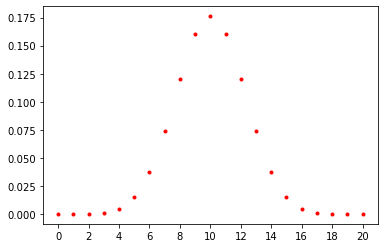

two-sided range: [0, 1, 2, 3, 4, 16, 17, 18, 19, 20]
p value: 0.01181793212890625
p value: 0.011817932128906248


In [15]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

n = 20
p = 1/2 
alpha = 0.05
x_obs = 16 
X = binom(n, p)

x = range(0, n+1)

plt.plot(x, X.pmf(x),".r")
plt.xticks(range(0, n+1,2))
plt.show()

print("two-sided range:",[i for i in range(0, n+1) if abs(i-10)>= x_obs-10])
print("p value:", 2*(1-X.cdf(x_obs - 1)))
print("p value:", sum([X.pmf(i) for i in range(0, n+1) if abs(i-10)>= x_obs-10]))

You perform a clinical trial to study new drug. You have 20 volunteers with some disease. You randomly split all the volunteers into two groups (10 volunteers in each): the treatment group and the control group. Volunteers in the treatment group receive the new drug, volunteers in the control group receive placebo (pills that looks like a drug but do not have active substance). You conclude that new drug is effective if people who take the drug will recover faster (on average) than people in the control group. If your drug is effective, you will invest in its production, otherwise you will look for another drug. Assume that you obtained the following data (disease duration in days).

<table >
    <tr><th >control group  <th><th> treatment group  <tr><tr>
    <tr><td> 6 <td><td>  7 <td><tr>
    <tr><td> 7 <td><td>  6 <td><tr>
    <tr><td> 7 <td><td>  6 <td><tr>
    <tr><td> 5 <td><td>  5 <td><tr>
    <tr><td> 7 <td><td>  5 <td><tr>
    <tr><td> 8 <td><td>  6 <td><tr>
    <tr><td> 8 <td><td>  7 <td><tr>
    <tr><td> 7 <td><td>  5 <td><tr>
    <tr><td> 7 <td><td>  5 <td><tr>
    <tr><td> 7 <td><td>  8 <td><tr>
<table>


Describe this problem in terms of statistical hypothesis testing framework. How would you model your data in terms of random variables? State the null hypothesis and the alternative. Will your alternative be one-sided or two-sided? Why? What kind of statistical test will you use? Why this test? Use this test (apply Python if necessary and provide your code), analyse the results and provide a conclusion in mathematical and real-life terms. Would you invest into production of this drug?

In [27]:
from scipy.stats import ttest_ind, t, norm

control = [6, 7, 7, 5, 7, 8, 8, 7, 7, 7]
treatment = [7, 6, 6, 5, 5, 6, 7, 5, 5, 8]

n = len(control)
mu_c = np.mean(control)
var_c = np.var(control, ddof=1)
mu_t = np.mean(treatment)
var_t = np.var(treatment, ddof=1)

t_cr = t(df=2*(n-1)).ppf(1-0.05240200640713197/2)
print(t_cr, 1-t(df=2*(n-1)).cdf(t_cr))
#distribution of means:
X_hat_c = norm(mu_c, np.sqrt(var_c/n))
X_hat_t = norm(mu_t,np.sqrt(var_t/n))

print("control mu:", np.mean(control), "treatment mu:", np.mean(treatment))
print(ttest_ind(control, treatment))
print(ttest_ind(control, treatment, equal_var=False))

2.0769230769230145 0.026201003203569218
control mu: 6.9 treatment mu: 6.0
Ttest_indResult(statistic=2.076923076923078, pvalue=0.05240200640713197)
Ttest_indResult(statistic=2.076923076923078, pvalue=0.05290570806269817)
